In [2]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

In [3]:
import samples.field.field as field
import mrcnn.utils as utils
import mrcnn.visualize as visualize
import mrcnn.model as modellib
from mrcnn.model import log

Using TensorFlow backend.


In [4]:
config = field.FieldConFig()

In [5]:
dataset = field.FieldDataset()
dataset.load_field()

Num files: 240


In [6]:
dataset.prepare()

In [7]:
print("Image count: {}".format(len(dataset.image_ids)))
print("Class count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}, {:50}".format(i, info["name"]))

Image count: 240
Class count: 2
  0, BG                                                
  1, field                                             


In [8]:
dataset.image_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

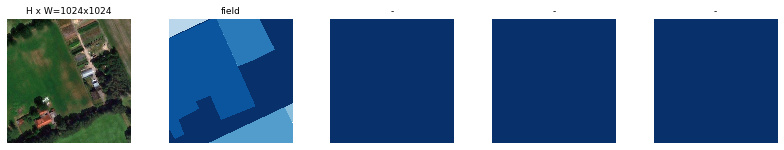

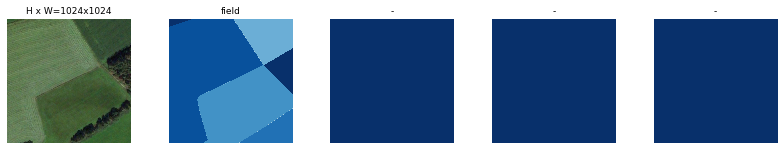

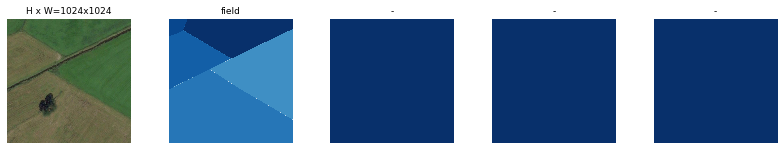

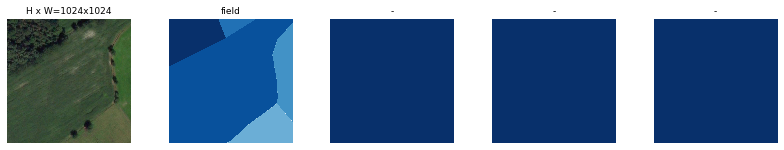

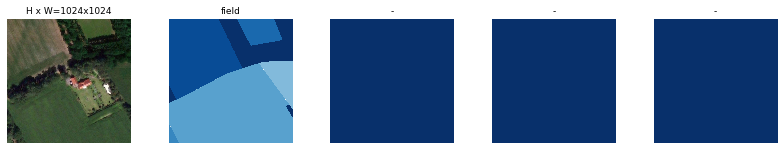

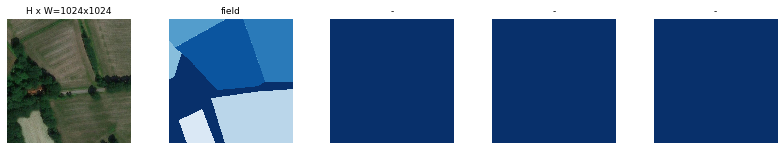

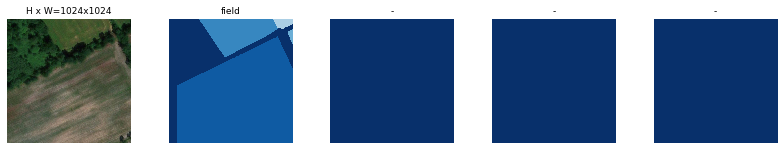

In [9]:
image_ids = np.random.choice(dataset.image_ids, 7)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

In [10]:
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("class_ids:", class_ids)
print("Image ID:", image_id)

Image shape: (1024, 1024, 3)
Mask shape: (1024, 1024, 4)
class_ids: [1 1 1 1]
Image ID: 40


In [11]:
bbox = utils.extract_bboxes(mask)

In [12]:
print("BBox:", bbox)

BBox: [[ 144   69 1024 1024]
 [   0  247  316  901]
 [  83  977  216 1024]
 [   0  858   86 1024]]


In [13]:
dataset.class_names

['BG', 'field']

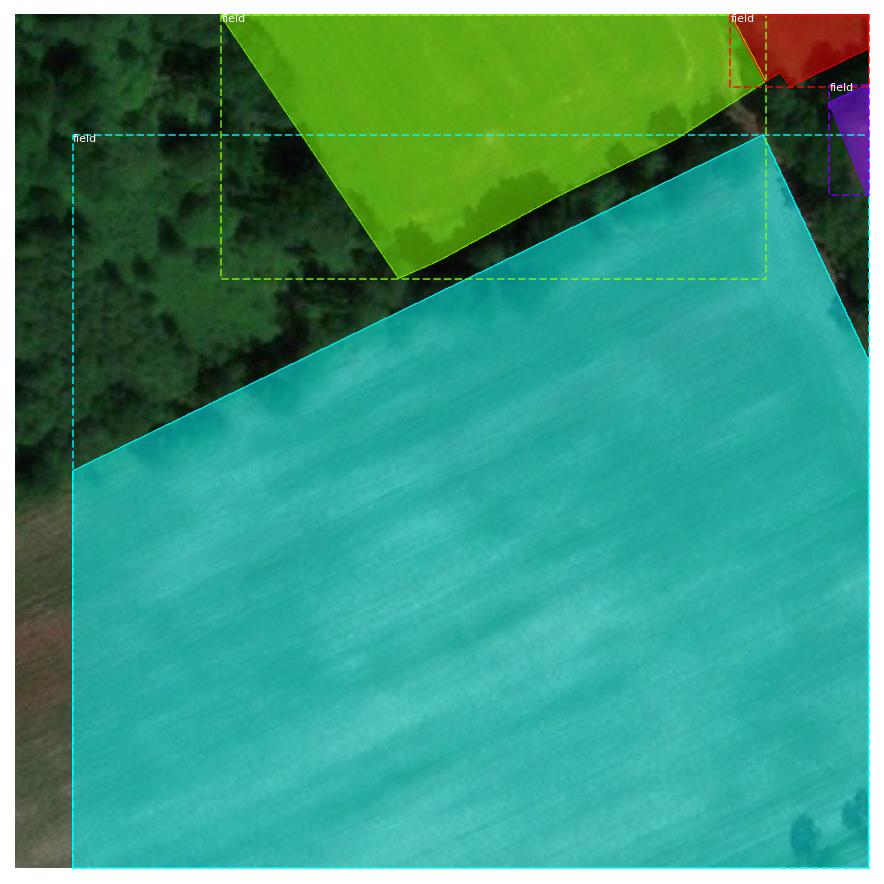

In [14]:
# display bbox
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [15]:
# config.IMAGE_SHAPE = np.array([2048,2048,3])
# config.IMAGE_MAX_DIM = 2048
# config.FPN_CLASSIF_FC_LAYERS_SIZE = 2048
# config.RPN_ANCHOR_SCALES = (64, 128, 256, 512, 1024)
config.USE_MINI_MASK = False

In [16]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [17]:
model = modellib.MaskRCNN(mode="training", config=config, model_dir="./logs")
model_path = model.find_last()
print("Load weights from ", model_path)
model.load_weights(model_path, by_name=True) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
Load weights from  ./logs\field20200510T2103\mask_rcnn_field_0001.h5
Re-starting from epoch 1


In [18]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
# import tensorflow as tf
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [18]:
model.train(dataset, dataset, learning_rate=config.LEARNING_RATE, epochs=15, layers='heads')


Starting at epoch 1. LR=0.001

Checkpoint Path: ./logs\field20200510T2103\mask_rcnn_field_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDist

In [19]:
# fix lỗi
# https://github.com/matterport/Mask_RCNN/issues/1754
# dòng 2199 file model

# Detection

In [20]:
model = modellib.MaskRCNN(mode="inference", 
                          config=config,
                          model_dir="./logs")
model_path = model.find_last()
print("Load weights from ", model_path)
model.load_weights(model_path, by_name=True)  



Instructions for updating:
Use `tf.cast` instead.


FileNotFoundError: [Errno 2] Could not find weight files in ./logs\field20200509T1718

original_image           shape: (2048, 2048, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 2048.00000  int32
gt_class_id              shape: (8,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (8, 4)                min:    0.00000  max: 2048.00000  int32
gt_mask                  shape: (2048, 2048, 8)       min:    0.00000  max:    1.00000  bool


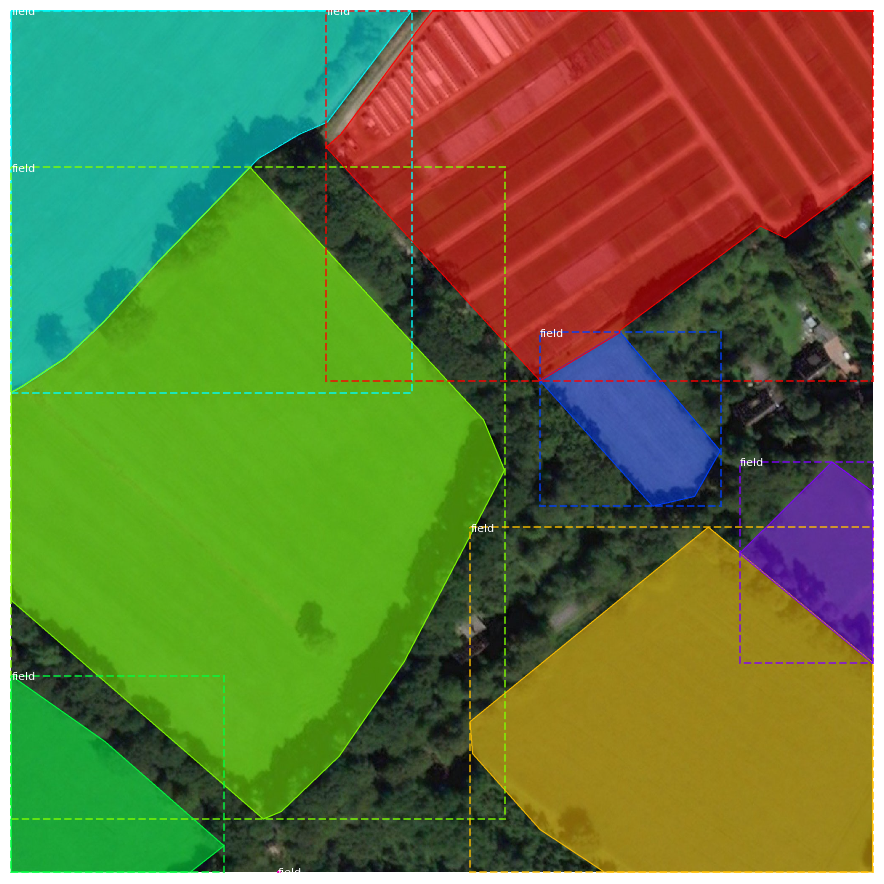

In [21]:
image_id = random.choice(dataset.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset.class_names)

In [22]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [23]:
results = model.detect([original_image], verbose=1)
r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'],  ax=get_ax())

Processing 1 images
image                    shape: (2048, 2048, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 2048, 2048, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2048.00000  int32
anchors                  shape: (1, 1047552, 4)       min:   -0.35373  max:    1.32246  float32


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[1,512,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node rpn_model_5/rpn_conv_shared/convolution}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[mrcnn_detection/Reshape_1/_3855]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[1,512,512,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node rpn_model_5/rpn_conv_shared/convolution}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.